In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [6]:
class ColHistMetric(maf.BaseMetric):
    """Histogram the values of a column in opsim, at each healpix.

    Parameters
    ----------
    colName : `str`, optional
        The column name of the opsim data value to histogram.
    bins : `np.ndarray`
        The bins to use for the histogram of data values. 
        
    Returns
    -------
    histogram : `np.ndarray`
        Returns a histogram of the data values at each slice point;
        these histograms can be combined and plotted using the 'SummaryHistogram plotter'.
    """

    def __init__(
        self,
        colName, 
        bins,
        **kwargs,
    ):
        # Pass the same bins to the plotter.
        self.bins = bins
        self.colName = colName
        super().__init__(
            col=[self.colName], metricDtype="object", **kwargs
        )

    def run(self, dataSlice, slicePoint=None):
        result, bins = np.histogram(dataSlice[self.colName], self.bins)
        return result

In [5]:
outdir = 'test'
opsim_db = get_baseline()
runName = os.path.split(opsim_db)[-1].replace('.db', '')
print(runName)

baseline_v2.0_10yrs


In [7]:
skybrightness_bins = np.arange(16, 23, 0.4)
m = ColHistMetric(colName='skyBrightness', bins=skybrightness_bins)
s = maf.HealpixSlicer(nside=32)
constraint = 'filter = "r"'

bundle = maf.MetricBundle(m, s, constraint, runName=runName)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [8]:
g = maf.MetricBundleGroup({'0': bundle}, opsim_db, outdir)

In [9]:
g.runAll()

Querying table None with constraint filter = "r" for columns ['rotSkyPos', 'fieldDec', 'fieldRA', 'skyBrightness']
Found 464851 visits
Running:  ['0']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [10]:
bundle.metricValues

masked_array(data=[--, --, --, ...,
                   array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 19,  0,  0,  0,  0,  0]),
                   array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 19,  0,  0,  0,  0,  0]),
                   array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  3, 20,  0,  0,  0,  0,  0])],
             mask=[ True,  True,  True, ..., False, False, False],
       fill_value=-1.6375e+30,
            dtype=object)

In [13]:
# Choose a point in the healpix grid 

s.slicePoints['ra'], s.slicePoints['dec']

(array([0.78539816, 2.35619449, 3.92699082, ..., 2.35619449, 3.92699082,
        5.49778714]),
 array([ 1.54528012,  1.54528012,  1.54528012, ..., -1.54528012,
        -1.54528012, -1.54528012]))

In [18]:
sidx = 9000
s[sidx]

{'idxs': array([371265, 230683, 136501,  34531, 363562, 306779, 324549, 128108,
        162740, 183711, 445725, 308545, 327756, 400605, 315389, 360075,
        235222, 157458,  36365,  36348, 157456,  42314, 124118, 122394,
        235122, 321685, 405202, 454050, 315707, 367423, 232803, 266304,
        224797, 236156,  40017, 358045, 134482, 225130, 314802, 137021,
        310581, 135057, 363924, 448919, 120506, 309687, 225970, 136947,
        309808,  67603, 460181, 264552, 129698, 172994, 224859, 406333,
        170062, 158729, 447166, 456966, 310642, 356495, 462573, 462240,
        253608, 125998, 132708, 460237, 368604,  37976, 136245, 367270,
        234022, 128984, 404529,  75235, 320403, 125253, 350873,  81358,
        312439, 409642, 125329, 409791, 127657, 128388, 229300, 220639,
        312603, 163124, 322077, 234318, 127244, 317924, 311915, 319750,
        411081, 221816, 373590, 326828,  38497, 322402, 320396, 326491,
        367424, 123941, 218639, 275631, 444420, 229301, 

In [20]:
bundle.metricValues[sidx], skybrightness_bins

(array([  0,   0,   0,   0,   0,   0,   0,   3,   6,   3,   9,  47, 126,
          0,   0,   0,   0]),
 array([16. , 16.4, 16.8, 17.2, 17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ,
        20.4, 20.8, 21.2, 21.6, 22. , 22.4, 22.8]))

Text(0, 0.5, 'Number of points')

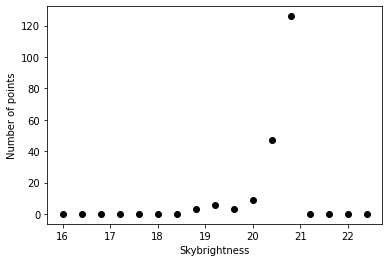

In [26]:
plt.plot(skybrightness_bins[:-1], bundle.metricValues[sidx], 'ko')
plt.xlabel('Skybrightness')
plt.ylabel('Number of points')